In [1]:
#Gọi các thư viện sử dụng cho Project:
# Data analysis and wrangling:
import pandas as pd
import numpy as np

# visualization:
import matplotlib.pyplot as plt
%matplotlib inline
#---------------------------------------
import warnings
warnings.filterwarnings('ignore')

### 1. Đọc dữ liệu đã chuẩn hóa:
---

In [2]:
#Đọc tập dữ liệu đã xử lý:
df_titanic = pd.read_csv('Data/Data_Titanic_ok.csv')
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1309 non-null   int64
 1   Pclass    1309 non-null   int64
 2   Sex       1309 non-null   int64
 3   Age       1309 non-null   int64
 4   SibSp     1309 non-null   int64
 5   Parch     1309 non-null   int64
 6   Embarked  1309 non-null   int64
dtypes: int64(7)
memory usage: 71.7 KB


In [3]:
#Hiển thị dữ liệu Titanic:
df_titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1202,0,3,0,1,0,0,1
434,0,1,0,3,1,0,0
725,0,3,0,1,0,0,0
1002,1,3,1,1,0,0,2
842,1,1,1,1,0,0,1


## Mô tả các thuộc tính:
---
* 1.Survived: 0: Không được cứu - 1: Được cứu
* 2.Pclass: Hạng vé( 1 - hạng nhất, 2 - hạng 2, 3 - hạng 3)
* 3.Sex: Giới tính (0 - Male, 1 - Nữ)
* 4.Age: Độ tuổi
        * 0: Tuổi từ 0 - 16 tuổi
        * 1: Tuổi từ 17 - 32 tuổi
        * 2: Tuổi từ 32 - 48 tuổi
        * 3: Tuổi từ 48 - 64 tuổi
        * 4: Tuổi từ 64 tuổi trở lên
* 5.SibSp: Số lượng anh chị em đi cùng
* 6.Parch: Số lượng con cái, ba mẹ đi cùng
* 7.Emberked: Cảng lên tàu (0: Cảng S, 1: Cảng C, 2: Cảng Q
    


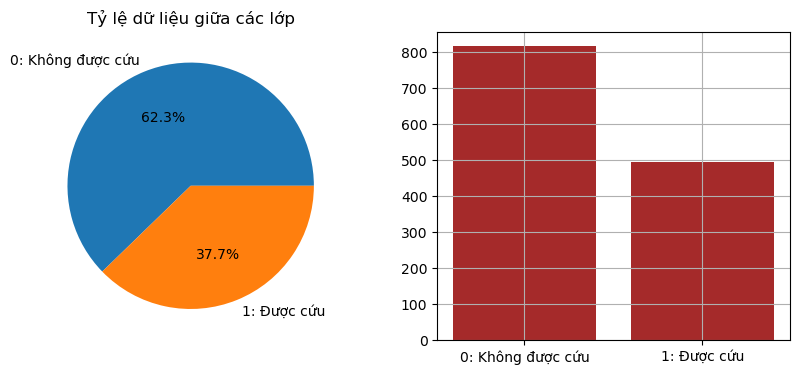

In [4]:
#Kiểm tra cân bằng dữ liệu
check = df_titanic['Survived'].value_counts()

#Trực quan hoá dữ liệu bằng biểu đồ
label = ['0: Không được cứu','1: Được cứu']

plt.figure(figsize=(10,4))
#Vẽ biểu đồ tròn:
plt.subplot(1,2,1)
plt.pie(check.values, labels = label,
       autopct='%.1f%%')
plt.title('Tỷ lệ dữ liệu giữa các lớp')

#Vẽ biểu đồ cột:
plt.subplot(1,2,2)
plt.bar(label, check.values,
       color = 'brown')
plt.grid()
plt.show()

## Đánh giá mức độ cân bằng của dữ liệu; có 4 trạng thái
1. Tập dữ liệu cân bằng: khi tỉ lệ giữa các lớp là tương đối bằng nhau
2. Tập dữ liệu mất cân bằng nhẹ: tỷ lệ lớp thiểu số chiếm từ 20 - 40% 
3. Tập dữ liệu mất cân bằng trung bình: tỷ lệ lớp thiểu số chiếm từ 1-20%
4. Tập dữ liệu mất cân bằng cực đoan: tỷ lệ lớp thiểu số chiếm <=1%

==> Tập dữ liệu titanic ở trạng thái mất cân bằng nhẹ! (Không xử lý cân bằng dữ liệu)

### 2. Phân tách Biến Đầu vào: X - Biến phụ thuộc (Nhãn): y
---

* Biến độc lập X: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'
* Biến phụ thuộc (nhãn) y: 'Survived'

In [5]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


In [6]:
#Tách biến độc lập - đầu vào của mô hình: X
X = df_titanic.loc[:,['Pclass','Sex','Age','SibSp','Parch','Embarked']].values
print('Kích thước biến X: ',X.shape)


Kích thước biến X:  (1309, 6)


In [7]:
X

array([[3, 0, 1, 1, 0, 0],
       [1, 1, 2, 1, 0, 1],
       [3, 1, 1, 0, 0, 0],
       ...,
       [3, 0, 2, 0, 0, 0],
       [3, 0, 1, 0, 0, 0],
       [3, 0, 1, 1, 1, 1]], dtype=int64)

In [8]:
y = df_titanic.loc[:,'Survived'].values
print('Kích thước biến y: ',y.shape)

Kích thước biến y:  (1309,)


In [9]:
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

### 3. Tách tập dữ liệu ra tập Training - Test: 
---
1. Biến độc lập X --> X_train, X_test
2. Biến phụ thuộc y --> y_train, y_test

* Tập Training set (X_train, y_train): dùng để huấn luyện mô hình (80%)
* Tập Test set (X_test, y_test): dùng để kiểm thử mô hình (20%)

In [10]:
#Gọi hàm tách dữ liệu train_test_split trong thư viện sklearn.model_selection:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   train_size=0.8,   #Tỉ lệ tập test
                                                   shuffle=True)     #Trộn dữ liệu
print('Tổng số mẫu trong tập dữ liệu:', len(y))
print('Số mẫu trong tập Train: ', len(y_train))
print('Số mẫu trong tập Test: ', len(y_test))




Tổng số mẫu trong tập dữ liệu: 1309
Số mẫu trong tập Train:  1047
Số mẫu trong tập Test:  262


In [11]:
#Hiển thị dữ liệu tập train,test
print(X_train.shape)
print(X_train)
print(y_train)




(1047, 6)
[[3 0 2 1 0 0]
 [3 0 2 1 5 0]
 [1 0 3 0 0 0]
 ...
 [3 0 1 0 0 2]
 [1 0 3 1 0 1]
 [2 0 1 2 0 0]]
[0 0 0 ... 0 0 0]


In [12]:
print(X_test)
print(y_test)


[[3 0 2 0 0 0]
 [2 0 1 0 0 0]
 [3 0 1 0 0 0]
 ...
 [1 1 2 0 0 1]
 [1 0 1 1 2 0]
 [3 0 1 0 0 0]]
[0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0
 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 0]


### 4. Xây dựng mô hình KNN cho bài toán phân lớp
---
Khai báo model KNN sử dụng thư viện sklearn:
sklearn.neighbors --> KNeighborsClassifier

In [13]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_titanic = KNeighborsClassifier(n_neighbors = 5)

#Hiển thị danh sách tham số: Model.get_params()
KNN_titanic.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Một số tham số quan trọng của thuật toán KNN trong thư viện sklearn:
Tham khảo KNN của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


1. n_neighbors: số điểm lân cận sử dụng (default = 5)
2. weights: có tính trọng số của các điểm lân cận hay không?
    * uniform: Tất cả các điểm lân cận đều có trọng số như nhau (default)
    * distance: Các điểm lân cận gần hơn sẽ được đánh trọng số cao hơn
3. algorithm: Thuật toán sử dụng để tính các điểm lân cận: ball_tree, kd_tree, brute, auto (default)
4. p: xác định khoảng cách tính theo manhattan (p=1) hay tính theo euclidean (p=2 default)


### 5. Huấn luyện mô hình

---
Sử dụng tập dữ liệu Training set để huấn luyện mô hình

In [14]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train,y_train)
KNN_titanic.fit(X_train, y_train)



KNeighborsClassifier()

In [15]:
#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
acc_train = KNN_titanic.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện: ', acc_train)
print('Độ chính xác trên tập huấn luyện: ', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện:  0.8767908309455588
Độ chính xác trên tập huấn luyện:  87.68


### 6. Đánh giá độ chính xác của mô hình trên tập Test
---

In [16]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_pred = KNN_titanic.predict(X_test)

In [17]:
#Kết quả dự đoán của mô hình trên tập test:
print(y_pred)
print(y_pred.shape)


[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 1 0]
(262,)


In [18]:
#So sánh kết quả dự đoán với kết quả thật với 20 hành khách đầu tiên:
print('thật',y_test[:20])
print('đoán',y_pred[:20])


thật [0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0]
đoán [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0]


**Thông số để đánh giá độ chính xác mô hình phân lớp:**

---
1. Đếm số lượng mẫu dự đoán đúng trong tổng số mẫu của tập test:
2. Accauracy: là cách đơn giản và hay được sử dụng nhất; Tính tỷ lệ % giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.
3. Sử dụng ma trận nhầm lẫn (Confusion matrix)

In [19]:
#Import module accuracy_score trong thư viện sklearn.metrics để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#1. Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
acc_test1 = accuracy_score(y_test, y_pred, normalize = False)

print('Tổng số mẫu dự đoán đúng:' , acc_test1,'/',len(y_test))

Tổng số mẫu dự đoán đúng: 221 / 262


In [20]:
220 / 262

0.8396946564885496

In [21]:
#2.Độ chính xác (Accuracy) theo tỷ lệ % 
#(số mẫu dự đoán đúng/tổng số mẫu của tập test): normalize=True
acc_test2 = accuracy_score(y_test, y_pred, normalize = True)

print('Độ chính xác của mô hình trên tập Test' , acc_test2)
print('Độ chính xác của mô hình trên tập Test' , round(acc_test2*100,2))

Độ chính xác của mô hình trên tập Test 0.8435114503816794
Độ chính xác của mô hình trên tập Test 84.35


#### Sử dụng Confusion matrix kiểm tra độ chính xác của model
---
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng (hoặc tổng có bao nhiêu mẫu phân loại đúng) mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix.

<img src='Pic/confusionmarix.jpg' width='400px'>

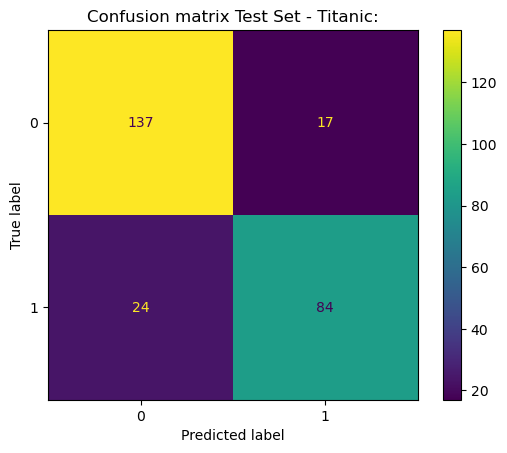

In [22]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Tính ma trận confusion matrix:
cnf_matrix_titanic = confusion_matrix(y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set - Titanic:')
plt.show()

**NHẬN XÉT:**

- Train: 84% -- test: 83% : Độ chính xác của mô hình ở trạng thái Underfiting
- --> Nâng cao độ chính xác

### 7. Thay đổi tham số của mô hình
---
* n_neighbors: số điểm lân cận (K nên chọn là số lẻ)
* weights: Đánh trọng số cho các điểm lân cận**
    * Trong kỹ thuật major voting bên trên, mỗi trong 11 điểm gần nhất được coi là có vai trò như nhau và giá trị lá phiếu của mỗi điểm này là như nhau. Trong thực tế ta thấy rằng những điểm gần hơn nên có trọng số cao hơn (càng thân cận thì càng tin tưởng). Vậy nên sẽ đánh trọng số khác nhau cho mỗi trong 11 điểm gần nhất này. Cách đánh trọng số phải thoải mãn điều kiện là một điểm càng gần điểm test data thì phải được đánh trọng số càng cao (tin tưởng hơn).

    * Scikit-learn giúp chúng ta đơn giản hóa việc này bằng cách gán gía trị weights = 'distance'. (Giá trị mặc định của weights là 'uniform', tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau như ở trên).

In [23]:
# Khai bảo mô hình mới bằng cách Thay đổi tham số n_neighbors, weights:
KNN_titanic2 = KNeighborsClassifier(n_neighbors= 11)

#Các tham số mới của Model:
KNN_titanic2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [24]:
#Thực hiện huấn luyện với dữ liệu tập train

KNN_titanic2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [25]:
#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN_titanic2.score(X_train,y_train)

print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 86.25


In [26]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred2 = KNN_titanic2.predict(X_test)

print("Kết quả dự đoán hành khách được cứu hay không được cứu trên tập dữ liệu TEST:")
print("Kết quả cho 20 hành khách đầu tiên:")
print("Predicted labels: ", y_pred2[:20])
print("Ground truth    : ", y_test[:20])

Kết quả dự đoán hành khách được cứu hay không được cứu trên tập dữ liệu TEST:
Kết quả cho 20 hành khách đầu tiên:
Predicted labels:  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0]
Ground truth    :  [0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0]


In [27]:
#1.Đếm số mẫu dự đoán đúng:
acc21 = accuracy_score(y_test, y_pred2, 
                       normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc21, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 219  / 262


In [28]:
#2.Tính độ chính xác %:
acc22 = accuracy_score(y_test, y_pred2,
                       normalize=True)

print('Độ chính xác của mô hình(k=11, weights=distance):', acc22)
print('Độ chính xác theo %:', round(acc22*100,2))

Độ chính xác của mô hình(k=11, weights=distance): 0.8358778625954199
Độ chính xác theo %: 83.59


Confusion matrix - Titanic:
[[138  16]
 [ 27  81]]


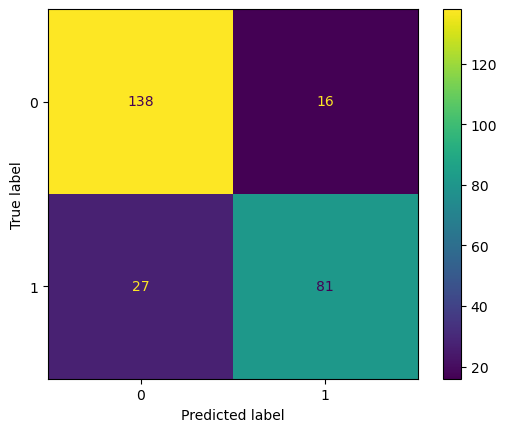

In [29]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_titanic = confusion_matrix(y_test,y_pred2)

#Hiển thị ma trân:
print('Confusion matrix - Titanic:')
print(cnf_matrix_titanic)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

In [30]:
#test đến khi tối ưu
#Giả sử mô hình KNN_titaic2 tốt hơn, độ chính xác chấp nhận được --> dùng mô hình này để đi dự đoán

## 8. Sử dụng mô hình
---
* Pclass: Hạng vé( 1 - hạng nhất, 2 - hạng 2, 3 - hạng 3)
* Sex: Giới tính (0 - Male, 1 - Nữ)
* Age: Độ tuổi
        * 0: Tuổi từ 0 - 16 tuổi
        * 1: Tuổi từ 17 - 32 tuổi
        * 2: Tuổi từ 32 - 48 tuổi
        * 3: Tuổi từ 48 - 64 tuổi
        * 4: Tuổi từ 64 tuổi trở lên
* SibSp: Số lượng anh chị em đi cùng
* Parch: Số lượng con cái, ba mẹ đi cùng
* Emberked: Cảng lên tàu (0: Cảng S, 1: Cảng C, 2: Cảng Q)


Cho biết Hành khách số 1 là một cô gái, 22 tuổi, mua vé hạng 3, đi tàu một mình, lên tàu ở cảng Q ---> Cho biết hành khách này Được cứu hay không được cứu?

In [31]:
df_titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1


In [32]:
#Khai báo Dữ liệu hành khách 1:

pclass = 3
sex = 1
age = 1
sib = 0
pa = 0
emb = 2

customer1 = np.array([[pclass,sex,age,sib,pa,emb]])
print(customer1)

[[3 1 1 0 0 2]]


In [1]:
#Sử dụng mô hình để dự đoán cho hành khách 1:

y_pred_1 = KNN_titanic2.predict(customer1)

if(y_pred_1==0):
    print('Chia buồn cùng gia quyến')
else:
    print("Bạn đã được cứu")



Bạn đã được cứu



Cho biết Hành khách số 2 là một người đàn ông trung niên, 40 tuổi, mua vé hạng 1, đi tàu với vợ, lên tàu ở cảng S ---> Cho biết hành khách này Được cứu hay không được cứu?


In [34]:
#Khai báo Dữ liệu hành khách 2:

pclass2 = 1
sex2 = 0
age2 = 2
sib2 = 1
pa2 = 0
emb2 = 0

customer2 = np.array([[pclass2,sex2,age2,sib2,pa2,emb2]])
print(customer2)



[[1 0 2 1 0 0]]


In [35]:
#Sử dụng mô hình để dự đoán cho hành khách 2:


y_pred_2 = KNN_titanic2.predict(customer2)

if(y_pred_2==0):
    print('Chia buồn cùng gia đình', y_pred_2)
else:
    print("Bạn đã được cứu", y_pred_2)




Chia buồn cùng gia đình [0]


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.
